In [1]:
import numpy as np
from numpy import sin, pi, exp
import matplotlib.pyplot as plt
import xarray as xr
import gsw
import xgcm
import cmocean.cm as cmo

In [2]:
dr=np.array(50*np.ones(100))
np.sum(dr) 
dr.shape
len(dr)

nx = 300
ny = 200
nr = len(dr)
rF = (np.insert(np.cumsum(dr),0,0)) # z-coordinates of vertical cell faces
z = np.diff(rF)/2 + rF[:-1]         # z-coordinates of vertical cell centers
H = -np.sum(dr)  
print(H)
# bathymetry -- flat bottom of depth H (m) with idealized mid-depth ridge
bump_max = 3000.   # peak height of ridge above flat bottom depth
bathy = H * np.ones([ny, nx])
bump = np.zeros([ny, nx])
# gaussian bump in the center of domain
# horizontal resoluiton in km 25
dx=5
dy=5
X=np.arange(0,nx*dx,dx)
Y=np.arange(0,ny*dx,dy)
[x,y] = np.meshgrid(X,Y)
# create a topography with a bump in the center to trigger a Taylor Column
X0=150*dx
Y0=100*dx;
width=20*dx;
bump=(H+bump_max*np.exp(-((x-X0)**2+(y-Y0)**2)/width**2))

print(dx)
bathy =  bump;  
bathy[0,:] = 0.                     # wall at southern boundary
bathy[ny-1,:] = 0. 
bathy.astype('>f4').tofile(f'bump{np.int(np.abs(H))}_{len(dr)}_{dx}km.bin')



-5000.0
5


# 20 layer

(100, 200, 300)


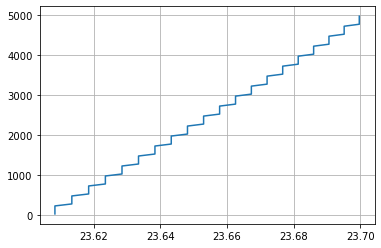

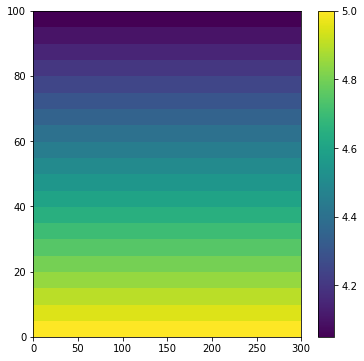

In [3]:
#create vertical T-profile
Tprof=np.linspace(5,4.05,20)    
Tprof100=np.zeros(100)+5
for zz in range(1,20):
    zini=zz*5
    Tprof100[zini:zini+5]=Tprof[zz]
Tprof100

sigma0=gsw.sigma0((np.zeros((Tprof100).shape))+30,Tprof100)
plt.plot(sigma0,z)
plt.grid()
# make the profile to a 3D field
Tini_field = np.zeros((nx,ny,nr))+Tprof100
Tini=Tini_field.T

plt.figure(figsize=(6,6))
cb=plt.pcolormesh(Tini[:,20,:])
plt.colorbar(cb)

# 3-D U velocity field for initial conditions and RBCS eastern and western wall profile
u0=-0.1*np.ones((nx,ny,nr))
U_3D = np.reshape(u0, [nr,ny,nx]) 
print(U_3D.shape)
U_3D.astype('>f4').tofile(f'Uvel_{len(dr)}_{dx}km.bin')

In [4]:
# create boundary files for obcs with dimension t(=x),z,y
print(Tini.shape)
Tini.astype('>f4').tofile(f'T_ini20l_{len(dr)}_{dx}km.bin')
Tobcs=np.transpose(Tini,(2,0,1))
Tobcs.shape

Tobcs.astype('>f4').tofile(f'T_obcs20l_{len(dr)}_{dx}km.bin')

(100, 200, 300)


(100, 200)
(100, 200, 300)
(300, 100, 200)
(300, 100, 200)


Text(0.5, 1.0, 'meridional average')

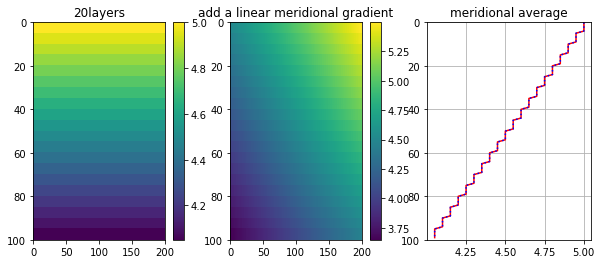

In [5]:
# add to the linear stratification a meridional gradient, but keep the meridional average as in the 20 equal layers
T_20l_dTdy=np.zeros((100,ny))
print(T_20l_dTdy.shape)
for zz in range(0,100):
        T_20l_dTdy[zz,:]=Tprof100[zz]+(0.2*Tprof100[zz]/ny)*(-99.5+Y/dy)
        
T_20l_dTdy_ini=np.repeat(T_20l_dTdy[ :, :,np.newaxis], nx, axis=2)
print(T_20l_dTdy_ini.shape)
T_dTdy_3d=np.repeat(T_20l_dTdy[np.newaxis, :, :], nx, axis=0)
T_dTdy_3d.shape
print(Tobcs.shape)
print(T_dTdy_3d.shape)

fig,axes=plt.subplots(1,3,figsize=(10,4),gridspec_kw={'width_ratios':[1,1,1]})
cb=axes[0].pcolormesh(Tobcs[59,:,:])
axes[0].invert_yaxis()
plt.colorbar(cb,ax=axes[0]) 
axes[0].set_title('20layers')

cb=axes[1].pcolormesh(T_dTdy_3d[59,:,:])
axes[1].invert_yaxis()
axes[1].set_title('add a linear meridional gradient')
plt.colorbar(cb,ax=axes[1]) 

axes[2].plot(Tobcs.mean(axis=2)[59,:],np.arange(0,100,1),color='r',label='20layers')
axes[2].plot(T_dTdy_3d.mean(axis=2)[59,:],np.arange(0,100,1),color='b',ls=':',label='add a gradient')
axes[2].set_ylim(0,100)
axes[2].invert_yaxis()
axes[2].grid()
axes[2].set_title('meridional average')

In [6]:
T_dTdy_3d[0,0,:]

array([4.5025, 4.5075, 4.5125, 4.5175, 4.5225, 4.5275, 4.5325, 4.5375,
       4.5425, 4.5475, 4.5525, 4.5575, 4.5625, 4.5675, 4.5725, 4.5775,
       4.5825, 4.5875, 4.5925, 4.5975, 4.6025, 4.6075, 4.6125, 4.6175,
       4.6225, 4.6275, 4.6325, 4.6375, 4.6425, 4.6475, 4.6525, 4.6575,
       4.6625, 4.6675, 4.6725, 4.6775, 4.6825, 4.6875, 4.6925, 4.6975,
       4.7025, 4.7075, 4.7125, 4.7175, 4.7225, 4.7275, 4.7325, 4.7375,
       4.7425, 4.7475, 4.7525, 4.7575, 4.7625, 4.7675, 4.7725, 4.7775,
       4.7825, 4.7875, 4.7925, 4.7975, 4.8025, 4.8075, 4.8125, 4.8175,
       4.8225, 4.8275, 4.8325, 4.8375, 4.8425, 4.8475, 4.8525, 4.8575,
       4.8625, 4.8675, 4.8725, 4.8775, 4.8825, 4.8875, 4.8925, 4.8975,
       4.9025, 4.9075, 4.9125, 4.9175, 4.9225, 4.9275, 4.9325, 4.9375,
       4.9425, 4.9475, 4.9525, 4.9575, 4.9625, 4.9675, 4.9725, 4.9775,
       4.9825, 4.9875, 4.9925, 4.9975, 5.0025, 5.0075, 5.0125, 5.0175,
       5.0225, 5.0275, 5.0325, 5.0375, 5.0425, 5.0475, 5.0525, 5.0575,
      

In [7]:
T_20l_dTdy_ini.astype('>f4').tofile(f'T_ini20l_wdTdy_{len(dr)}_{dx}km.bin')
T_dTdy_3d.astype('>f4').tofile(f'T_obcs20l_wdTdy_{len(dr)}_{dx}km.bin')

(300, 200, 100)
(300, 100, 200)


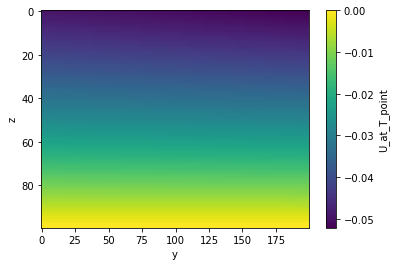

In [8]:
# compute density from T_field
g=9.81
f=gsw.f(-65)
# compute pressure and density
p=np.zeros((nx,ny,nr))+gsw.p_from_z(-1*z,-65)
print(p.shape)
rho=gsw.rho(np.zeros(np.transpose(T_dTdy_3d,(1,2,0)).shape)+30,np.transpose(T_dTdy_3d,(1,2,0)), p.T)
rho.shape
ds = xr.Dataset()
ds['rho'] = (('z', 'y', 'x'), rho)
ds['sigma0']=(('z', 'y', 'x'),gsw.sigma0(np.zeros(np.transpose(T_dTdy_3d,(1,2,0)).shape)+30,np.transpose(T_dTdy_3d,(1,2,0))))
ds = ds.assign_coords(x=ds.x, y=ds.y, z=ds.z)
ds.x.attrs['axis'] = 'X'
ds.y.attrs['axis'] = 'Y'
ds.z.attrs['axis'] = 'Z'
ds = xgcm.generate_grid_ds(ds, {'X':'x', 'Y':'y', 'Z':'z'})
grid = xgcm.Grid(ds, periodic=False)
ds['dr'] = ('z', dr)
rev = -1*(g/f)*grid.cumsum(
    (
        grid.interp(1/ds.rho, 'Y', boundary='extend') * grid.diff(ds.rho, 'Y', boundary='extend') / (dy*10**3)
    ) * ds.dr,
    'Z',
    boundary='fill',
    fill_value=0
)
velocity = rev.isel(z_left=-1) - rev
ds['U_at_T_point'] = grid.interp(velocity, ['Y', 'Z'], boundary='extend')
ds['U_at_T_point'].mean('x').plot(y='z', yincrease=False)
U_tw=np.asarray(ds.U_at_T_point.transpose("x", "z", "y"))
print(U_tw.shape)
U_tw.astype('>f4').tofile(f'Uvel_tw_20lwdTdy_xzy_{len(dr)}_{dx}km.bin') # I assume the x dimension is read as t dimension 

-0.12714684227143494
(300, 100, 200)


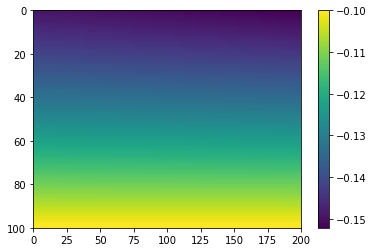

In [9]:
# add to the thermal wind a barotropic component
U_utw=U_tw-0.1
print(U_utw[59,:,:].mean(axis=1).mean(axis=0))
plt.pcolormesh(U_utw[59,:,:])
plt.colorbar()
plt.gca().invert_yaxis()
print(U_utw.shape)
U_utw.astype('>f4').tofile(f'Uvel_u01tw_20lwdTdy_xzy_{len(dr)}_{dx}km.bin') # I assume the x dimension is read as t dimension 

# e-scale T-profile

(100, 200, 300)


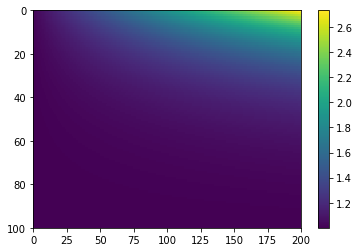

In [16]:
Tmax = 10.
Tmin = 1.
# 3-D Temperature field for initial conditions and RBCS northern wall profile
h = 1000             # e-folding scale for temperature decrease with depth
T_surf = np.zeros([ny, nx]) + np.reshape(
            Tmin + (Tmax-Tmin)/ny * np.linspace(0.5,39.5,ny),[ny,1]) # at (XC,YC) points
zscale = (exp(-z/h) - exp(H/h)) / (1 - exp(H/h))
zscale = np.reshape(zscale, [nr,1,1])
T_3D = np.reshape(T_surf - Tmin, [1,ny,nx]) * zscale + Tmin
print(T_3D.shape)
plt.pcolormesh(T_3D[:,:,10])
plt.colorbar()

plt.gca().invert_yaxis()


T_3D.astype('>f4').tofile(f'T_initw5000_{len(dr)}_{dx}km.bin')

(300, 200, 100)
(100, 200, 300)


<ipython-input-17-fe43bb8aea77>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Y,z,rho[:,:,59])


Text(0, 0.5, 'Depth [m]')

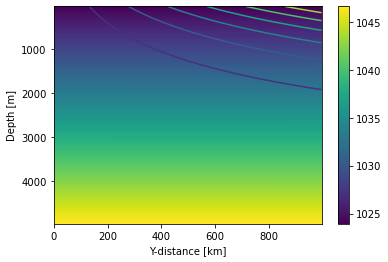

In [17]:
# compute density from T_field
g=9.81
f=gsw.f(-65)
# compute pressure and density
p=np.zeros((nx,ny,nr))+gsw.p_from_z(-1*z,-65)
print(p.shape)
rho=gsw.rho(np.zeros(T_3D.shape)+30,T_3D, p.T)
rho.shape
# create boundary files for obcs with dimension t(=x),z,y
print(T_3D.shape)
Tobcstw=np.transpose(T_3D,(2,0,1))
Tobcstw.shape

#Tobcstw.astype('>f4').tofile(f'T_obcstw_{len(dr)}_25km.bin')
plt.pcolormesh(Y,z,rho[:,:,59])
plt.colorbar()
plt.contour(Y,z[:],T_3D[:,:,59])
plt.gca().invert_yaxis()
plt.xlabel('Y-distance [km]')
plt.ylabel('Depth [m]')

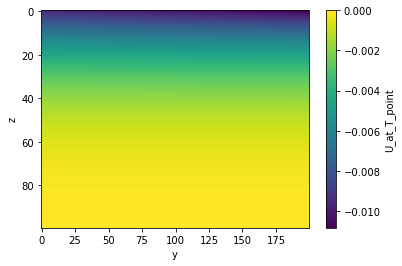

In [18]:
ds = xr.Dataset()
ds['rho'] = (('z', 'y', 'x'), rho)
ds['sigma0']=(('z', 'y', 'x'),gsw.sigma0(np.zeros((T_3D.shape))+30,T_3D))
ds = ds.assign_coords(x=ds.x, y=ds.y, z=ds.z)
ds.x.attrs['axis'] = 'X'
ds.y.attrs['axis'] = 'Y'
ds.z.attrs['axis'] = 'Z'
ds = xgcm.generate_grid_ds(ds, {'X':'x', 'Y':'y', 'Z':'z'})
grid = xgcm.Grid(ds, periodic=False)
ds['dr'] = ('z', dr)
rev = -1*(g/f)*grid.cumsum(
    (
        grid.interp(1/ds.rho, 'Y', boundary='extend') * grid.diff(ds.rho, 'Y', boundary='extend') / (dy*10**3)
    ) * ds.dr,
    'Z',
    boundary='fill',
    fill_value=0
)
velocity = rev.isel(z_left=-1) - rev
ds['U_at_T_point'] = grid.interp(velocity, ['Y', 'Z'], boundary='extend')
ds['U_at_T_point'].mean('x').plot(y='z', yincrease=False)

(300, 100, 200)


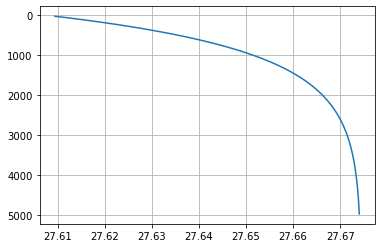

In [19]:
U_tw=np.asarray(ds.U_at_T_point.transpose("x", "z", "y"))
print(U_tw.shape)
U_tw.astype('>f4').tofile(f'Uvel5000_tw_xzy_{len(dr)}_25km.bin') # I assume the x dimension is read as t dimension 
sig_test0=(gsw.sigma0(np.zeros((T_3D.shape))+30,T_3D))
sig_test1=(gsw.sigma0(np.zeros((T_3D.shape))+34.7,T_3D))
#plt.plot(np.mean(sig_test0,axis=1).mean(axis=1),z)
plt.plot(np.mean(sig_test1,axis=1).mean(axis=1),z)
plt.gca().invert_yaxis()
plt.grid()


In [20]:
U_u01tw=np.asarray(ds.U_at_T_point.transpose("x", "z", "y"))-0.1
print(U_u01tw.shape)
U_u01tw.astype('>f4').tofile(f'Uvel5000_u01tw_xzy_{len(dr)}_{dx}km.bin') # I assume the x dimension is read as t dimension 

(300, 100, 200)
